# Описание проекта

Интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Описание данных


- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


План работы

Шаг 1. Откроем файл с данными и изучим общую информацию


Шаг 2. Подготовим данные
- Заменим названия столбцов (приведем к нижнему регистру);
- Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему;
- Обработаем пропуски при необходимости:
- Объясним, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишем причины, которые могли привести к пропускам;
- Обратим внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберем это значение и опишем, как его обработать;
- Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

Шаг 3. Проведем исследовательский анализ данных

- Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не будем учитывать в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
- Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.
- Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.
- Соотнесем выводы с продажами игр на других платформах.
- Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Шаг 4. Составим портрет пользователя каждого региона

- Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишем различия в долях продаж.
- Самые популярные жанры (топ-5). Поясним разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Шаг 5. Проверим гипотезы

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


Шаг 6. Напишем общий вывод

#  Шаг 1 Открытие данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import re
import math
from IPython.display import display

In [2]:
df = pd.read_csv('/datasets/games.csv')
pd.options.display.max_columns = None

In [3]:
display(df)
display(df.describe().T)
df.info()


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод 
- В таблице 16715 строк 
- В таблице большие пропуски в столбцах Critic_Score, User_Score, Rating
- Столбцы Year_of_Release  и  User_Score нужно привести к правельному типу данных 

# Шаг 2 Подготовка данных

### Приведем столбцы и строки к нижнему региструи проверим на дубликаты


In [4]:
df = df.rename(columns={'Name':'name', 'Platform':'platform', 'Year_of_Release':'year_of_release', 'Genre':'genre', 'NA_sales':'na_sales', 'EU_sales':'eu_sales', 'JP_sales':'jp_sales', 'Other_sales':'other_sales', 'Critic_Score':'critic_score', 'User_Score':'user_score', 'Rating':'rating'})
df['name'] = df['name'].str.lower()
df['genre'] = df['genre'].str.lower()
df['platform'] = df['platform'].str.lower()
df.duplicated().sum() # дубликатов нет

0

###  Посмортим пропуски в процентах

In [5]:
print('Количество пропусков в столбце "Жанр": {:.3%}'.format(df['genre'].isna().sum() / df['genre'].shape[0]))
print('Количество пропусков в столбце "Название": {:.3%}'.format(df['name'].isna().sum() / df['name'].shape[0]))
print('Количество пропусков в столбце "Год релиза": {:.3%}'.format(df['year_of_release'].isna().sum() / df['year_of_release'].shape[0]))
print('Количество пропусков в столбце "Оценка критиков": {:.3%}'.format(df['critic_score'].isna().sum() / df['critic_score'].shape[0]))
print('Количество пропусков в столбце "Пользовательская оценка": {:.3%}'.format(df['user_score'].isna().sum() / df['user_score'].shape[0]))
print('Количество пропусков в столбце "Возврастной рейтинг": {:.3%}'.format(df['rating'].isna().sum() / df['rating'].shape[0]))

Количество пропусков в столбце "Жанр": 0.012%
Количество пропусков в столбце "Название": 0.012%
Количество пропусков в столбце "Год релиза": 1.609%
Количество пропусков в столбце "Оценка критиков": 51.319%
Количество пропусков в столбце "Пользовательская оценка": 40.090%
Количество пропусков в столбце "Возврастной рейтинг": 40.479%


- пропуски в столбцах: жанр, название и год релиза можно удалить т.к. слишком маленький процент
- пропуски в Оценках  заменим на медиану по жанрам
- рейтинг оставим пропуски

### Поиск  и обработка артефактов

In [6]:
df['genre'].unique() # артефактов нет

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy', nan], dtype=object)

In [7]:
display(df['rating'].unique())
df['rating'] = df['rating'].replace('K-A', 'E')


array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Пояснение обозначений:
- 'E' от 6 лет,  'K-A' тоже самое, использовалось до 1997 года, в таблице заменим на  'E'
- 'M' от  17 лет
- 'T' от 13лет
- 'E10+' от 10 лет
- 'AO' от 18 лет
- 'EC' от 3 лет
- 'RP' рейтинг не присвоен, используется в демо версиях игры или на презентации

In [8]:
display(df['user_score'].unique()) # артефакт 'tbd' значит to be determined, что приравнивается к  Nan

df['user_score'] = df['user_score'].replace('tbd', np.nan, regex=True) # заменим на  Nan
df['user_score'] = df['user_score'].astype('float64') # приведем к нужному типу данных


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

### Обработка пропусков 

In [9]:
df = df.loc[(df['name'].isna() == False)] # удалим пропуски, в связи с малым количеством
df = df.loc[(df['year_of_release'].isna() == False)]

df['year_of_release'] = df['year_of_release'].astype('int16') # приведем данные к нужному типу

### Создание столбца с сумарными продажами 

In [10]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']


### Вывод 
- Привели данные к правильному типу
- Столбцы и строки привели к нижнему регистру
- Проверили на дубликаты, дубликатов нет
- Обработали пропуски,пропуски в  оценках критиков и пользователей заполнили  медианой по жанру
- Создали столбец с сумарными продажами

# Шаг 3 Исследовательский анализ данных

In [11]:
def find_mustache(column):   # зададим функцию по поиску усов, все что вне усов является выбросами 
    describe = df[column].describe()
    box = describe[6] - describe[4]
    low_mustache = describe[4] - 1.5 * box
    up_mustache = describe[6] + 1.5 * box
    if low_mustache < describe[3]: 
        low_mustache = describe[3]
    if up_mustache > describe[7]:
        up_mustache = describe[7]
    return [low_mustache, up_mustache]


### Посмортим количество релизов по годам 

Text(0.5, 0, 'Год релиза')

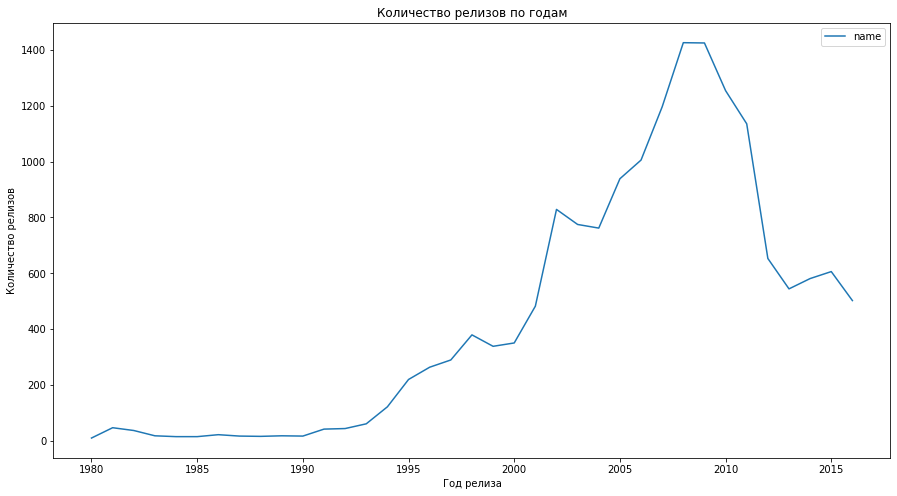

In [12]:
plt.figure(figsize=(15,8))# отрисуем график для наглядности
sns.lineplot(data = df.pivot_table(index='year_of_release', values='name', aggfunc='count'))
plt.title('Количество релизов по годам')
plt.ylabel('Количество релизов')
plt.xlabel('Год релиза')




Усы  [1992.5, 2016.0]


count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

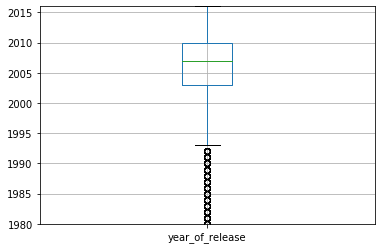

In [13]:
df.boxplot('year_of_release')
plt.ylim(1980,2016)
print('Усы ', find_mustache('year_of_release'))
df['year_of_release'].describe()


Данные до 1992 года являются выбросами, в дальнейшем их использовать не будем 

In [14]:
good_df = df.query('year_of_release > 1992').reset_index(drop=True)

###  Посмотрим количество релизов по платформам

Text(0.5, 0, 'Платформа')

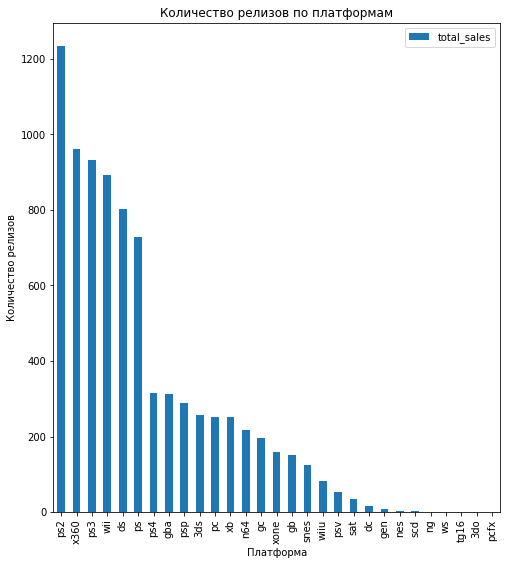

In [15]:
good_df.pivot_table(index='platform', 
               values = 'total_sales', 
               aggfunc='sum').sort_values(by='total_sales',ascending=False).plot(kind='bar',figsize=(8,9))
plt.title('Количество релизов по платформам')
plt.ylabel('Количество релизов')
plt.xlabel('Платформа')

### Построим таблицу с топ 10 платформ по продажам

In [16]:
top10_platforms = good_df.pivot_table(index='platform', 
                                 values='total_sales',
                                 aggfunc='sum').sort_values(by='total_sales',ascending=False).head(10)
top10_platforms

,total_sales
platform,
ps2,1233.56
x360,961.24
ps3,931.34
wii,891.18
ds,802.76
ps,727.58
ps4,314.14
gba,312.88
psp,289.53


### Построим распределение по годам платформ с наибольшими продажами

In [17]:
def create_pivot_table(name, data): # зададим функцию, которая будет создавать объедененую таблицу по платформе и продажам
    total = data[(data['platform'] == name)].pivot_table(index='year_of_release', 
                                                         values='total_sales', 
                                                         aggfunc='sum').sort_values('year_of_release', ascending=False)
    return total

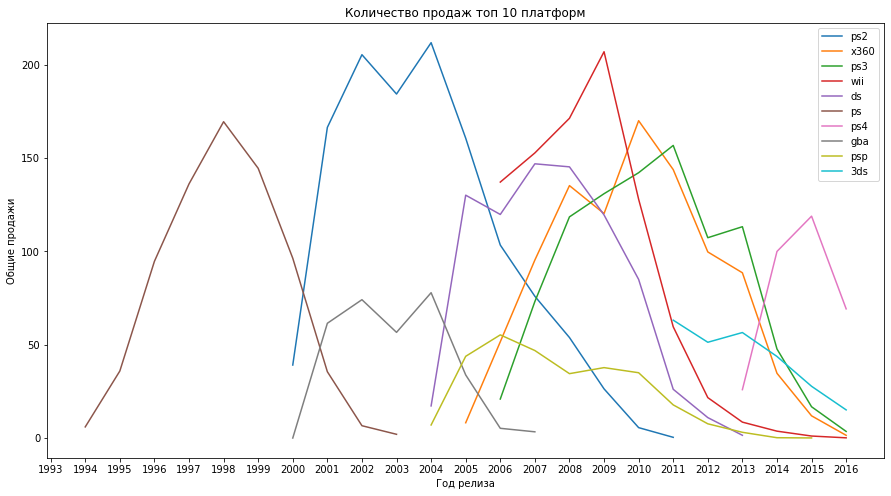

In [18]:
plt.figure(figsize=(15,8))
plt.title('Количество продаж топ 10 платформ')
plt.xlabel('Год релиза')
plt.ylabel('Общие продажи')
plt.xticks(range(1992,2017))

for i in list(top10_platforms.index): # отрисуем распределени для наглядности
    sns.lineplot(data=create_pivot_table(i,good_df)['total_sales'], label=i)
    plt.legend

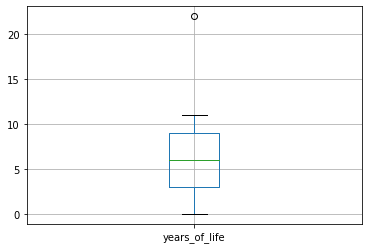

In [19]:

years_of_life_platforms = good_df.pivot_table(index = 'platform',
                                             values = 'year_of_release',
                                             aggfunc= ['max','min'])
years_of_life_platforms.columns = ['death_year', 'start_yaer']
years_of_life_platforms['years_of_life'] = years_of_life_platforms['death_year'] - years_of_life_platforms['start_yaer']
years_of_life_platforms.boxplot('years_of_life')



На графике видна тенденция: срок жизни платформы около 10 лет,хотя медиана находится на отметке в 6лет , спад прадаж наблюдается через 3-5 лет после появление платфлормы

In [20]:
current_df = good_df.query('year_of_release>2012') # 

### Посмотрим продажи по платформам за актуальный период

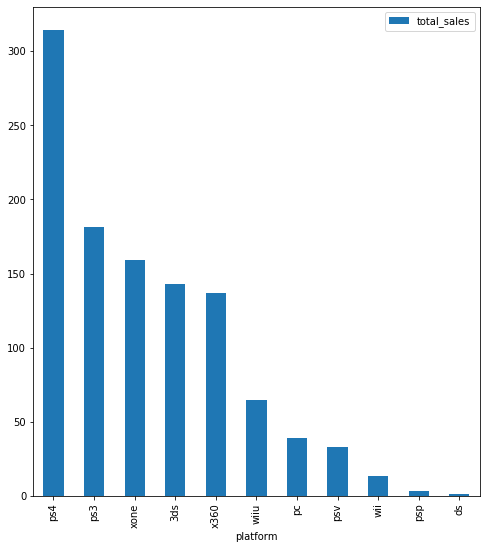

In [21]:
platform_df = current_df.pivot_table(index='platform', 
               values = 'total_sales', 
               aggfunc='sum').sort_values(by='total_sales',ascending=False)
platform_df.plot(kind='bar',figsize=(8,9))

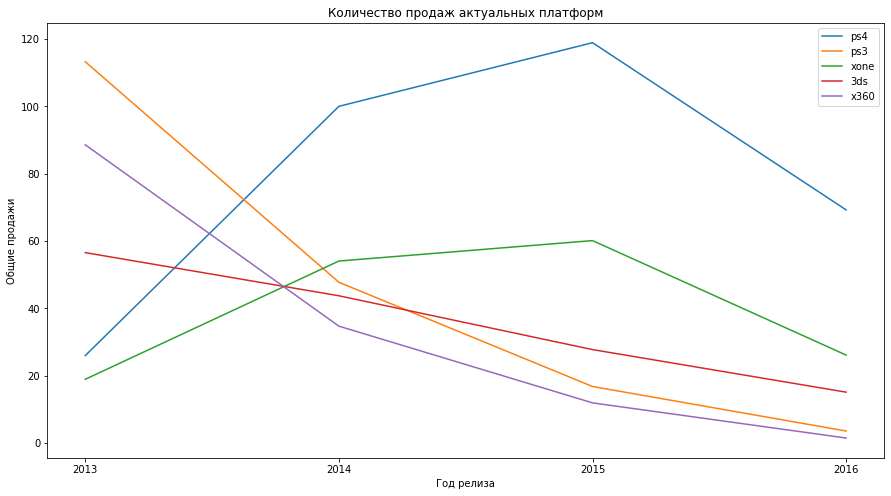

In [22]:
current_platforms = current_df.pivot_table(index='platform', 
                                 values='total_sales',
                                 aggfunc='sum').sort_values(by='total_sales',ascending=False).head(5)

plt.figure(figsize=(15,8))
plt.title('Количество продаж актуальных платформ')
plt.xlabel('Год релиза')
plt.ylabel('Общие продажи')
plt.xticks(range(2013,2017))

for i in list(current_platforms.index):
    sns.lineplot(data=create_pivot_table(i,current_df)['total_sales'], label=i)
    plt.legend



На графике видно, что есть две потенциально прибыльные  платформы это PS4 и Xbox One, для построение продаж на 2017 год не стоит учитывать данны раньше 2013 года

### Построим график "ящик с усами по платформам"

Text(0, 0.5, 'Общие продажи')

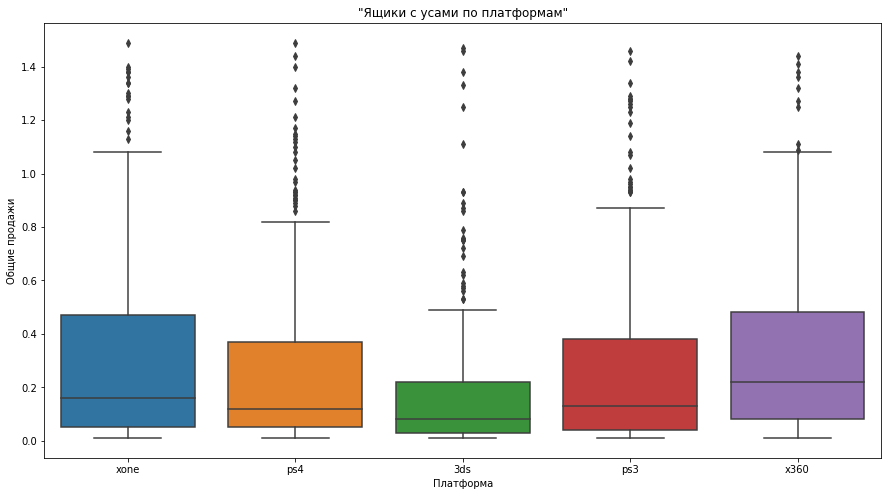

In [23]:
top5_current_platforms = current_df[current_df['platform'].isin(list(current_platforms.index))].query('total_sales < 1.5')
plt.figure(figsize=(15,8))

sns.boxplot(x='platform', y='total_sales', data=top5_current_platforms,)

plt.title('"Ящики с усами по платформам"')
plt.xlabel('Платформа')
plt.ylabel('Общие продажи')





На графике видно что медиана у всех разная, топ по продажам  c 2013 года это ps3, x360

### Посмотрим как отзывы критиков и пользователей влияют на продажи

,total_sales,critic_score,user_score
total_sales,1.000000,0.350345,-0.011742
critic_score,0.350345,1.000000,0.520946
user_score,-0.011742,0.520946,1.000000


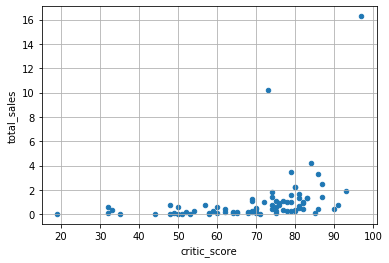

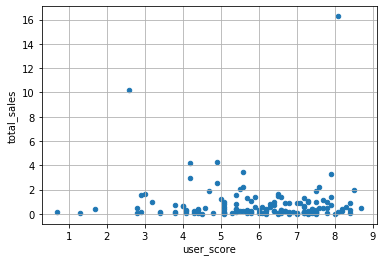

In [24]:
# возьмем топ платформу и посмотрим на ней как влияют отзывы на продажи
x360_df = current_df.query('platform == "x360"').reset_index(drop=True)
display(x360_df.loc[:,['total_sales','critic_score','user_score']].corr())
x360_df.plot(x='critic_score', y='total_sales', kind='scatter',grid=True)
x360_df.plot(x='user_score', y='total_sales', kind='scatter',grid=True)


Есть умеренная взаимосвязь(кореляция 0,35) между оценкой критиков и общими продажами, и нет взаимосвязи(кор. почти 0) между оценкой пользователей и продажами наплатформе x360

#### Соотнесем выводы с другими платформами

In [25]:
dict1 = {}# создадим таблицу с корреляцией по платформам
for platform_name in list(current_platforms.index):
    platform = current_df[current_df['platform']==platform_name]
    critic_corr = platform['critic_score'].corr(platform['total_sales'])
    user_corr = platform['user_score'].corr(platform['total_sales'])
    dict1[platform_name.upper()] = [critic_corr, user_corr]
df1 = pd.DataFrame.from_dict(dict1, orient='index',columns=["critic_corr", "user_corr"])
display(df1)
    
    #print('Корреляция между оценками критиков и общими продажами на  игровой платформе ', platform_name.upper(), 'равна:', critic_corr)
    #print('Корреляция между оценками игроков и общими продажами на  игровой платформе ', platform_name.upper(), 'равна:', user_corr)
    #print()

                                            
   
    
    
    
    

,critic_corr,user_corr
PS4,0.406568,-0.031957
PS3,0.334285,0.002394
XONE,0.416998,-0.068925
3DS,0.357057,0.241504
X360,0.350345,-0.011742


Взаимосвзь  между оценкой критиков и продажами у платформ:
- умеренная

Взаимосвзь  между оценкой критиков и продажами у платформ:
- 3DS умеренная 

- у Остальных  очень слабая

### Посмотрим на распределение игр по жанрам 

Text(0, 0.5, 'Общие продажи')

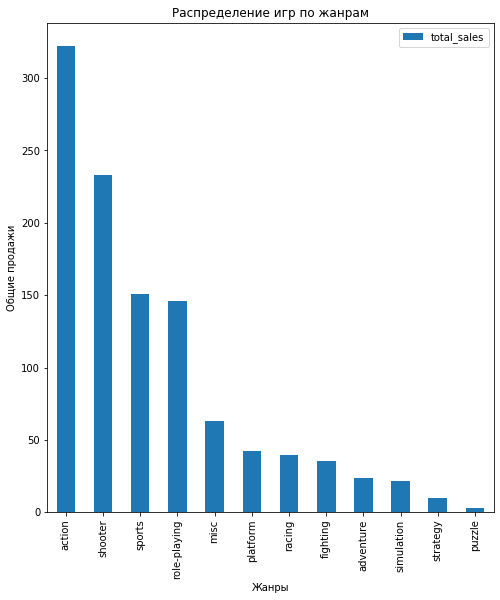

In [26]:
genre_df = current_df.pivot_table(index='genre', 
               values = 'total_sales', 
               aggfunc='sum').sort_values(by='total_sales',ascending=False)
genre_df.plot(kind='bar',figsize=(8,9)) # отрисуем график 

plt.title('Распределение игр по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Общие продажи')

Самые прибыльные жанры(по убыванию): Action, Shooter, Role-playing, Sports

Самые не популярные жанры:  Strtegy, puzzle

### Вывод по исследовательскому анализу 
- Количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х годов до 2008 года. С 2008 года, после того как массово начали создавать мобильные приложения и мобильные игры, произошел резкий спад разработок игр на игровые платформы.
- Самые популярные игровые платформы за весь период : Sony PlayStation 2, Xbox 360, Sony Playstation 3, Nintendo WII, Nintendo DS, Sony Playstation.
- Средняя жизнь игровой платформы составляет 10 лет. Пик продаж наступает примерно через 5 лет после выхода приставки.
- Больше всего продаются игры на Sony Playstation и Xbox 360
- Самые прибыльные жанры(по убыванию): Action, Shooter, Role-playing, Sports
- Самые не популярные жанры: Strаtegy, puzzle
- Игроки больше прислушиваются к мнению критиков чем к другим игрокам 




# Шаг 4 Составьте портрет пользователя каждого региона


### Посмотрим на топ 5 платформ по регионам 

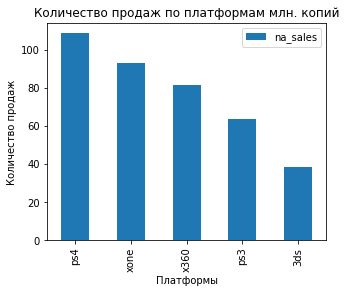

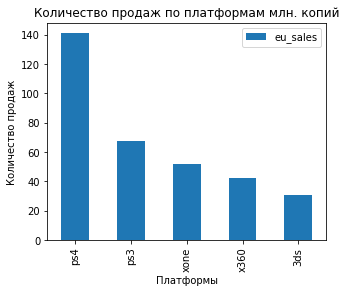

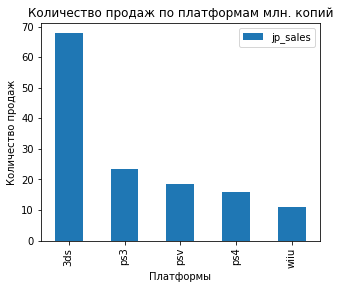

In [27]:

for column in df.loc[:,['na_sales', 'eu_sales', 'jp_sales']]:
    data = current_df.pivot_table(index='platform', 
               values = column, 
               aggfunc='sum').sort_values(by=column,ascending=False).head(5)
    data.plot(kind='bar',figsize=(5,4))
    plt.title('Количество продаж по платформам млн. копий')
    plt.xlabel('Платформы')
    plt.ylabel('Количество продаж')
    plt.show()
  

В Северной Америке предпочтение отдают PS4  и  Xbox One, в Евросоюзе  PS4, в Японии   Nintendo 3ds

### Посмотрим на долю продаж в процентах  по платформам

In [28]:
share_platforms_sale_df = current_df.pivot_table(index='platform', 
               values = ['na_sales', 'eu_sales', 'jp_sales', 'total_sales'], 
               aggfunc='sum')

share_platforms_sale_df['eu_to_total_%'] = share_platforms_sale_df['eu_sales'] / share_platforms_sale_df['total_sales'] * 100
share_platforms_sale_df['na_to_total_%'] = share_platforms_sale_df['na_sales'] / share_platforms_sale_df['total_sales'] * 100
share_platforms_sale_df['jp_to_total_%'] = share_platforms_sale_df['jp_sales'] / share_platforms_sale_df['total_sales'] * 100

share_platforms_sale_df

,eu_sales,jp_sales,na_sales,total_sales,eu_to_total_%,na_to_total_%,jp_to_total_%
platform,,,,,,,
3ds,30.96,67.81,38.20,143.25,21.612565,26.666667,47.336824
ds,0.85,0.00,0.57,1.54,55.194805,37.012987,0.000000
pc,25.36,0.00,11.11,39.43,64.316510,28.176515,0.000000
ps3,67.81,23.35,63.50,181.43,37.375296,34.999724,12.869977
ps4,141.09,15.96,108.74,314.14,44.913096,34.615140,5.080537
psp,0.17,3.29,0.00,3.50,4.857143,0.000000,94.000000
psv,6.10,18.59,5.04,32.99,18.490452,15.277357,56.350409
wii,5.93,0.05,6.56,13.66,43.411420,48.023426,0.366032
wiiu,19.85,10.88,29.21,64.63,30.713291,45.195730,16.834287


### Посмотрим на топ 5 жанров по регионам  

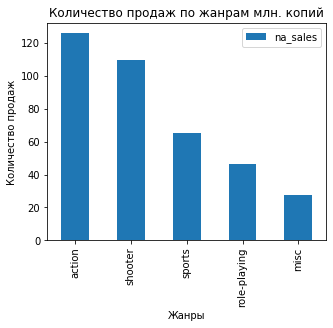

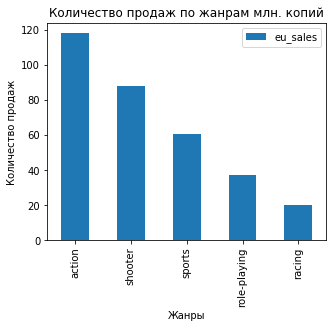

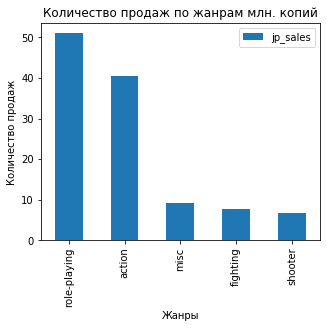

In [29]:
for column in df.loc[:,['na_sales', 'eu_sales', 'jp_sales']]:
    data = current_df.pivot_table(index='genre', 
               values = column, 
               aggfunc='sum').sort_values(by=column,ascending=False).head(5)
    data.plot(kind='bar',figsize=(5,4))
    plt.title('Количество продаж по жанрам млн. копий')
    plt.xlabel('Жанры')
    plt.ylabel('Количество продаж')
    plt.show()
    

 В Северной Америке и Европе предпочитают Жанры Action и Shooter, В Японии Role-playing и Action

In [30]:
share_genres_sale_df = current_df.pivot_table(index='genre', 
               values = ['na_sales', 'eu_sales', 'jp_sales', 'total_sales'], 
               aggfunc='sum')

share_genres_sale_df['eu_to_total_%'] = share_genres_sale_df['eu_sales'] / share_genres_sale_df['total_sales'] * 100
share_genres_sale_df['na_to_total_%'] = share_genres_sale_df['na_sales'] / share_genres_sale_df['total_sales'] * 100
share_genres_sale_df['jp_to_total_%'] = share_genres_sale_df['jp_sales'] / share_genres_sale_df['total_sales'] * 100


share_platforms_sale_df

,eu_sales,jp_sales,na_sales,total_sales,eu_to_total_%,na_to_total_%,jp_to_total_%
platform,,,,,,,
3ds,30.96,67.81,38.20,143.25,21.612565,26.666667,47.336824
ds,0.85,0.00,0.57,1.54,55.194805,37.012987,0.000000
pc,25.36,0.00,11.11,39.43,64.316510,28.176515,0.000000
ps3,67.81,23.35,63.50,181.43,37.375296,34.999724,12.869977
ps4,141.09,15.96,108.74,314.14,44.913096,34.615140,5.080537
psp,0.17,3.29,0.00,3.50,4.857143,0.000000,94.000000
psv,6.10,18.59,5.04,32.99,18.490452,15.277357,56.350409
wii,5.93,0.05,6.56,13.66,43.411420,48.023426,0.366032
wiiu,19.85,10.88,29.21,64.63,30.713291,45.195730,16.834287


### Посмотрим на распределение рейтингов по регионам 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


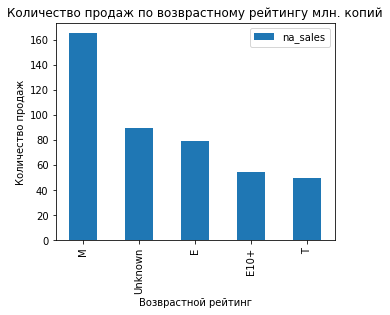

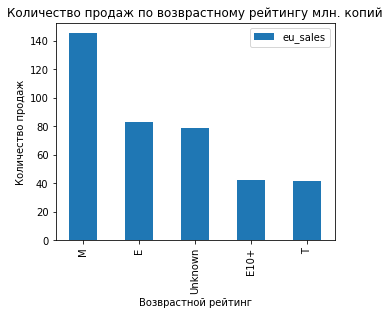

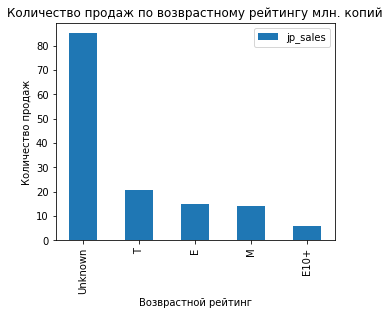

In [31]:
current_df['rating'] = current_df['rating'].fillna('Unknown')
for column in df.loc[:,['na_sales', 'eu_sales', 'jp_sales']]:
    data = current_df.pivot_table(index='rating', 
               values = column, 
               aggfunc='sum').sort_values(by=column,ascending=False)
    data.plot(kind='bar',figsize=(5,4))
    plt.title('Количество продаж по возврастному рейтингу млн. копий')
    plt.xlabel('Возврастной рейтинг')
    plt.ylabel('Количество продаж')
    plt.show()

In [32]:
current_df['rating'].unique()

array(['M', 'Unknown', 'E', 'T', 'E10+'], dtype=object)

### Вывод

- Портрет пользователя Северной Америки:
  - Жанр Экшн или Стрелялка, на платформе Ps4 или  Xbox One c рейтингом  М
- Портрет пользователя Евросоюза:
  - Жанр Экшн или Стрелялка, на платформе Ps4 или  Ps3 c рейтингом  М
- Портрет пользователя Японии:
  - Жанр РПГ или Экшн, на платформе нинтендо 3дс, с рейтингом Т

Отличие Японии от других, обусловлена их особым конкурентным менталитетом и стремлению к совершенству, в играх РПГ стремиться и качаться пользователь может очень долго в отличии от других жанров

# Шаг 5 Проверьте гипотезы



### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые  

 Нулевая гипотеза H₀:
 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
 
 Альтернативная гипотеза H₁:
 - Средние пользовательские рейтинги платформ Xbox One и PC различается

In [33]:
xone_df = current_df.query('platform == "xone"').reset_index(drop=True)
pc_df = current_df.query('platform == "pc"').reset_index(drop=True)


In [34]:
alpha = 0.01  

results = st.ttest_ind(xone_df['user_score'].dropna(), pc_df['user_score'].dropna(), equal_var= False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Вывод: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые, мала вероятность того, что среднее будет разлечаться

## Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные
 Нулевая гипотеза H₀:
 - Средние пользовательские рейтинги жанров Action  и Sports одинаковые
 
 Альтернативная гипотеза H₁:
 - Средние пользовательские рейтинги жанров Action и Sports разные



In [35]:
action_df = current_df.query('genre =="action"').reset_index(drop=True)
sports_df = current_df.query('genre =="sports"').reset_index(drop=True)



In [36]:
alpha = 0.01  

results = st.ttest_ind(action_df['user_score'].dropna(), sports_df['user_score'].dropna(), equal_var= False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Вывод: Средние пользовательские рейтинги жанров Action и Sports разные

# Шаг 6 Общий вывод

- Привели данные к правильному типу
- Столбцы и строки привели к нижнему регистру
- Проверили на дубликаты, дубликатов нет
- Обработали пропуски,пропуски в  оценках критиков и пользователей заполнили  медианой по жанру
- Создали столбец с сумарными продажами

- Количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х годов до 2008 года. С 2008 года, после того как массово начали создавать мобильные приложения и мобильные игры, произошел резкий спад разработок игр на игровые платформы.
- Самые популярные игровые платформы за весь период : Sony PlayStation 2, Xbox 360, Sony Playstation 3, Nintendo WII, Nintendo DS, Sony Playstation.
- Средняя жизнь игровой платформы составляет 10 лет. Пик продаж наступает примерно через 5 лет после выхода приставки.
- Больше всего продаются игры на Sony Playstation и Xbox 360
- Самые прибыльные жанры(по убыванию): Action, Shooter, Role-playing, Sports
- Самые не популярные жанры: Strаtegy, puzzle
- Игроки больше прислушиваются к мнению критиков чем к другим игрокам 

- Портрет пользователя Северной Америки:
  - Жанр Экшн или Стрелялка, на платформе Ps4 или  Xbox One c рейтингом  М
- Портрет пользователя Евросоюза:
  - Жанр Экшн или Стрелялка, на платформе Ps4 или  Ps3 c рейтингом  М
- Портрет пользователя Японии:
  - Жанр РПГ или Экшн, на платформе нинтендо 3дс, с рейтингом Т
  
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Средние пользовательские рейтинги жанров Action и Sports разные


На 2017 год предполагаем, что лучше продавать игру для платформ PS4 b Xbox One, В жанре Экшен и Стрелялка(Для Японии РПГ), с возврастным рейтингом  М


